# KindleVC Keywords Selection

In [1]:
import pandas as pd
from gensim.models import Word2Vec 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)

In [2]:
df = pd.read_csv('keyword_ventures.csv')
df.head()

,Keyword,Relevancy,Min Monthly Volume,Max Monthly Volume,Specific Monthly Volume
0,ventures,5,1701.0,2900.0,1739.972040
1,ventures definition,5,201.0,500.0,251.919166
2,ventures songs,5,101.0,200.0,111.469551
3,ventures band,5,0.0,10.0,0.000000
4,ventures meaning,5,11.0,50.0,27.242406


In [3]:
df.shape

(1000, 5)

In [4]:
df_key = df.Keyword.copy()
df_key.head()

0               ventures
1    ventures definition
2         ventures songs
3          ventures band
4       ventures meaning
Name: Keyword, dtype: object

In [5]:
df_key.isnull().sum()

0

In [6]:
df_key

0                                 ventures
1                      ventures definition
2                           ventures songs
3                            ventures band
4                         ventures meaning
                      ...                 
995               comcast office locations
996              comcast corporate address
997                  google europe website
998    youtube the ventures walk don't run
999              comcast philadelphia jobs
Name: Keyword, Length: 1000, dtype: object

In [7]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
corpus = []
for i in range(0, len(df_key)):
    review = re.sub('[^a-zA-Z]', ' ', df_key[i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus[:5]

['venture',
 'venture definition',
 'venture song',
 'venture band',
 'venture meaning']

In [9]:
df_clean = pd.DataFrame(corpus,columns = ['Ventures_keywords'])

In [10]:
df_clean.head()

,Ventures_keywords
0,venture
1,venture definition
2,venture song
3,venture band
4,venture meaning


In [11]:
sent = [row.split(' ') for row in df_clean['Ventures_keywords']]

In [12]:
sent[:50]

[['venture'],
 ['venture', 'definition'],
 ['venture', 'song'],
 ['venture', 'band'],
 ['venture', 'meaning'],
 ['venture', 'ffxiv'],
 ['venture', 'arcade'],
 ['venture', 'synonym'],
 ['venture', 'music'],
 ['venture', 'song'],
 ['venture', 'website'],
 ['venture', 'member'],
 ['venture', 'apache'],
 ['venture'],
 ['wilson', 'venture'],
 ['venture', 'seattle'],
 ['leon', 'taylor', 'drummer'],
 ['venture', 'album', 'cover'],
 ['venture', 'youtube'],
 ['apache', 'venture'],
 ['venture', 'album', 'cover'],
 ['venture', 'greatest', 'hit'],
 ['original', 'venture'],
 ['venture', 'wiki'],
 ['venture', 'forth', 'meaning'],
 ['venture', 'business'],
 ['bob', 'spalding'],
 ['apache', 'venture', 'original'],
 ['venture', 'surf', 'music'],
 ['venture', 'tour'],
 ['venture', 'website'],
 ['song', 'venture'],
 ['youtube', 'venture', 'pipeline'],
 ['venture', 'music', 'free', 'download'],
 ['venture', 'tour'],
 ['venture', 'walk', 'run'],
 ['venture', 'drummer'],
 ['venture', 'new', 'album'],
 ['ven

In [13]:
from gensim.models import Word2Vec 
model = Word2Vec(sent, min_count=2,size= 800,workers=3, window =20, sg = 1)

In [14]:
words=list(model.wv.vocab)
print(words)

['venture', 'definition', 'song', 'band', 'meaning', 'ffxiv', 'arcade', 'synonym', 'music', 'website', 'member', 'apache', 'wilson', 'seattle', 'leon', 'taylor', 'drummer', 'album', 'cover', 'youtube', 'greatest', 'hit', 'original', 'wiki', 'forth', 'business', 'bob', 'spalding', 'surf', 'tour', 'pipeline', 'free', 'download', 'walk', 'run', 'new', 'inc', 'fan', 'club', 'store', 'google', 'job', 'instrumental', 'first', 'never', 'video', 'best', 'telstar', 'mp', 'history', 'bio', 'discography', 'biography', 'bros', 'venturing', 'mean', 'great', 'fund', 'work', 'ventured', 'howie', 'johnson', 'guitarist', 'v', 'adventure', 'gerry', 'mcgee', 'billboard', 'current', 'tamil', 'surfing', 'blog', 'pioneer', 'square', 'lab', 'company', 'psl', 'studio', 'guitar', 'pound', 'bee', 'rock', 'roll', 'hall', 'fame', 'entrepreneurship', 'com', 'play', 'tube', 'lead', 'group', 'english', 'wikipedia', 'squad', 'commercial', 'cash', 'career', 'venturist', 'christmas', 'hindi', 'sentence', 'golden', 'off

In [15]:
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.000573,-0.000172,0.000219,0.001562,-0.000349,0.000332,-0.000848,-0.001344,-0.000697,-0.000358,...,-0.000624,0.000708,-0.000135,-0.000413,0.000960,0.001138,0.000154,-0.000636,0.001057,-0.000269
1,0.000548,0.000485,0.000401,0.000653,-0.000436,-0.000259,-0.000593,-0.000181,0.000024,-0.000385,...,-0.000450,0.000019,-0.000602,-0.000599,0.000016,0.000534,0.000388,0.000161,0.000244,0.000412
2,0.000102,-0.000047,-0.000533,0.001268,-0.000091,-0.000284,-0.000563,-0.000224,-0.000177,0.000227,...,0.000555,-0.000258,0.000473,-0.000636,0.000535,-0.000107,0.000331,0.000350,0.000228,0.000386
3,-0.000110,-0.000425,0.000329,-0.000277,-0.000014,0.000299,0.000028,0.000027,-0.000026,-0.000288,...,0.000318,0.000032,0.000099,0.000276,0.000143,-0.000289,-0.000255,-0.000478,-0.000235,0.000207
4,0.000354,0.000525,-0.000573,-0.000166,-0.000272,0.000589,-0.000043,-0.000080,0.000415,-0.000512,...,0.000383,-0.000353,-0.000605,-0.000587,-0.000069,-0.000052,-0.000576,0.000300,0.000166,0.000455


In [16]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

In [20]:
model.wv.index2entity[:40]

['venture',
 'song',
 'meaning',
 'album',
 'pipeline',
 'walk',
 'run',
 'apache',
 'capital',
 'youtube',
 'music',
 'guitar',
 'comcast',
 'hit',
 'business',
 'definition',
 'best',
 'surf',
 'mean',
 'band',
 'telstar',
 'company',
 'wilson',
 'seattle',
 'wipeout',
 'ffxiv',
 'greatest',
 'play',
 'google',
 'rock',
 'drummer',
 'download',
 'ventured',
 'go',
 'synonym',
 'new',
 'venturing',
 'free',
 'original',
 'mp']

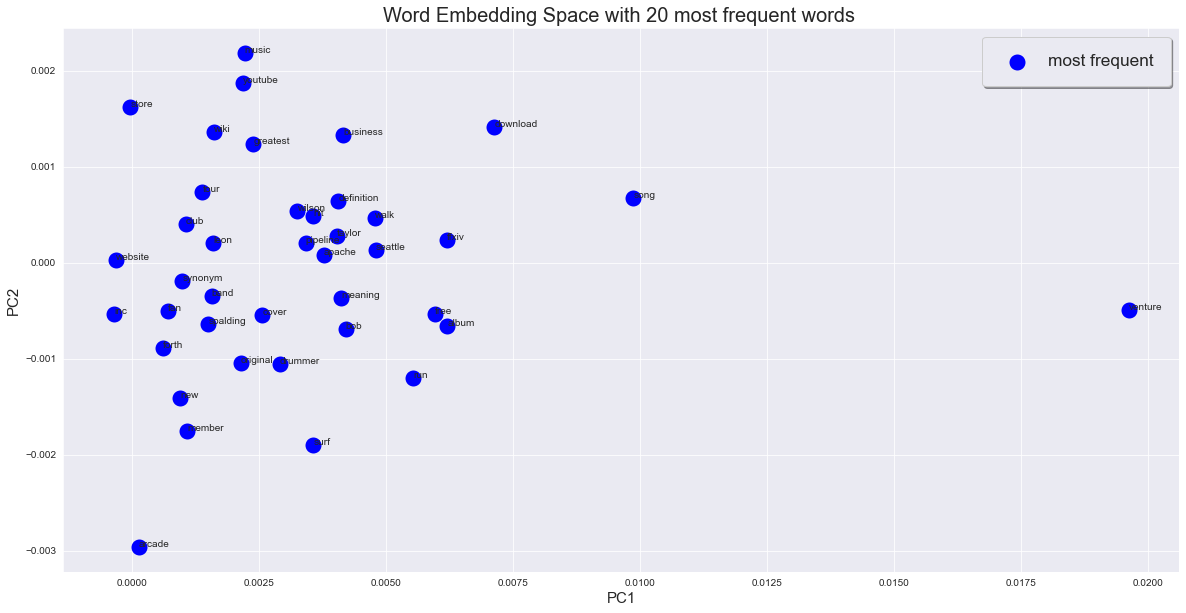

In [19]:
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# plt.scatter(neww_X[20:,0],neww_X[20:,1],linewidths=10,color='red',label='least frequent')
plt.scatter(neww_X[:40,0],neww_X[:40,1],linewidths=10,color='blue',label = 'most frequent')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='xx-large')
plt.title("Word Embedding Space with 20 most frequent words ",size=20)
vocab=list(model.wv.vocab)[:40]
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
plt.savefig('most_least_words.png', dpi=400, bbox_inches='tight')
#   plt.annotate(word,xy=(neww_X[i+19,0],neww_X[i+19,1]))